<a href="https://colab.research.google.com/github/ShubhInfotech-Bhilai/AI-ML-DL-NN/blob/master/%20Getting%20started%20with%20filters%20and%20parameter%20sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.callbacks import EarlyStopping
from keras.datasets import mnist


In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#y_train[2] # Label/target 
print(y_train[0])

5


In [26]:
img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train.shape


(60000, 28, 28, 1)

In [27]:

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


In [28]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [29]:
y_train.shape

(60000,)

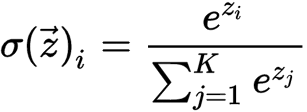

In [ ]:
def softmax(a):
 return np.exp(a) / np.sum(np.exp(a))

In [ ]:
import numpy as np
a = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
softmax(a)

In [30]:
n_classes = len(set(y_train)) #y_train label
y_train = to_categorical(y_train, n_classes)

y_test = to_categorical(y_test, n_classes)

Streaming output truncated to the last 5000 lines.
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.

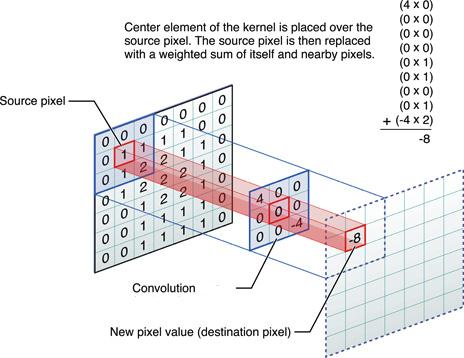

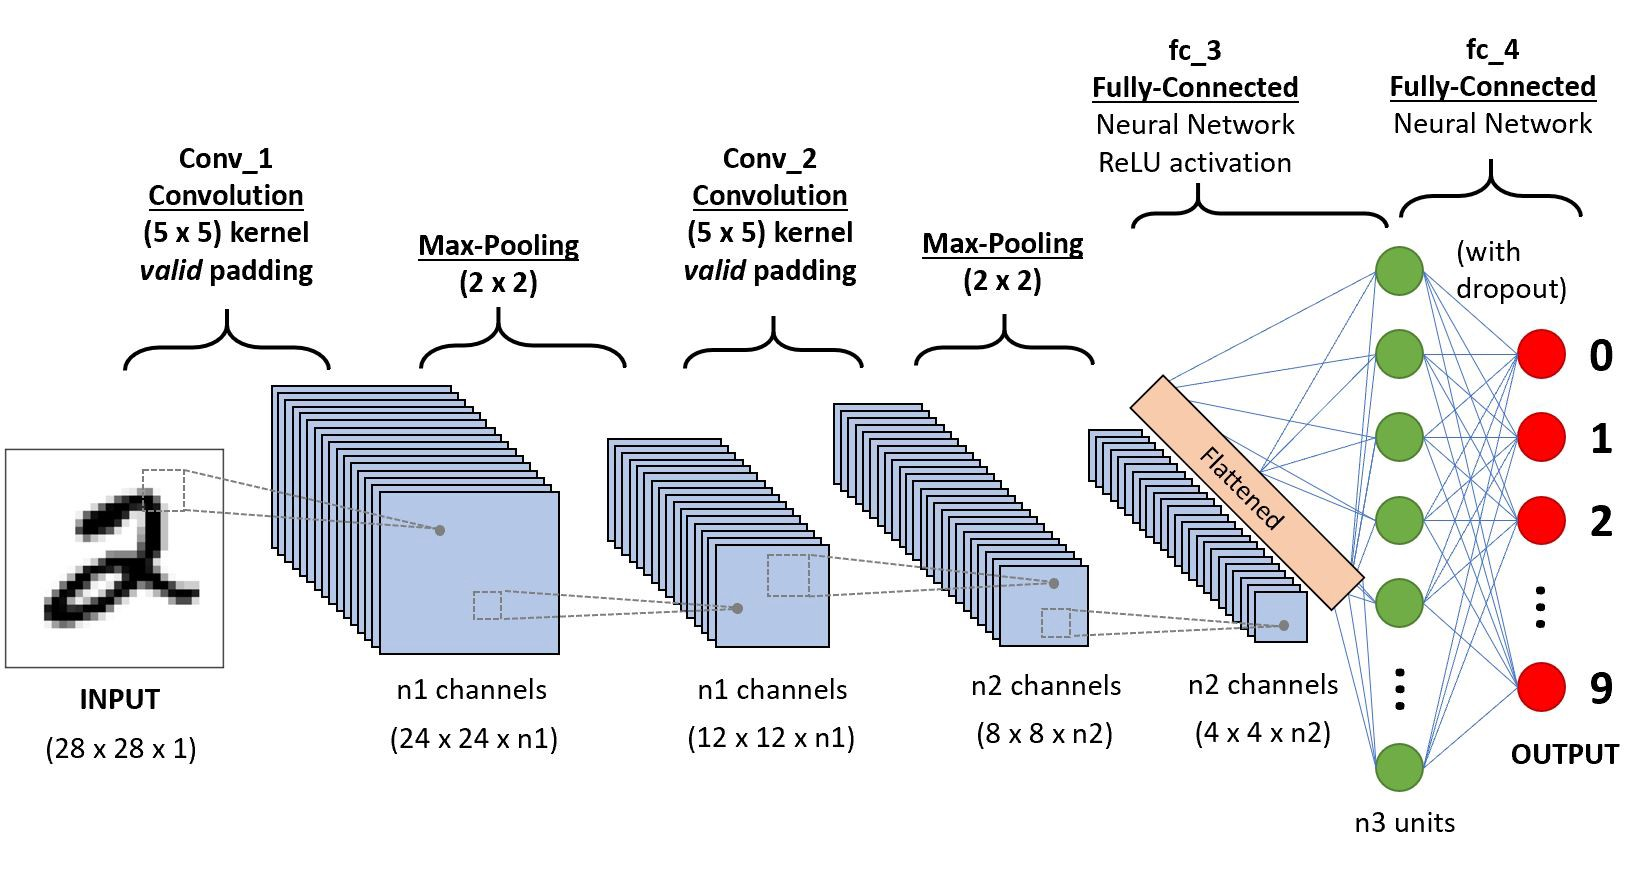

In [31]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax')) # 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 256)       295168    
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 123904)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15859840  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [32]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5)]

In [33]:
batch_size = 128
n_epochs = 200

In [34]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_split=0.2, callbacks=callbacks)

Epoch 1/200
375/375 [==============================] - 1440s 4s/step - loss: 0.4494 - accuracy: 0.8608 - val_loss: 0.0523 - val_accuracy: 0.9838
Epoch 2/200
122/375 [========>.....................] - ETA: 13:46 - loss: 0.0721 - accuracy: 0.9787

KeyboardInterrupt: ignored

Test loss: 0.036987073719501495
Test accuracy: 0.9886999726295471


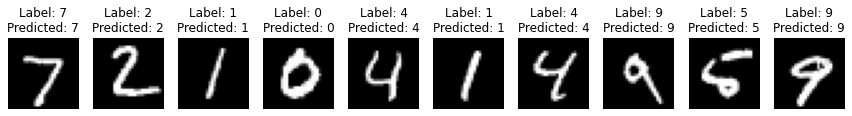

In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Extract predictions
preds = model.predict(X_test)

n_examples = 10
plt.figure(figsize=(15, 15))
for i in range(n_examples):
    ax = plt.subplot(2, n_examples, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(preds[i])))
    plt.axis('off')
    
plt.show()

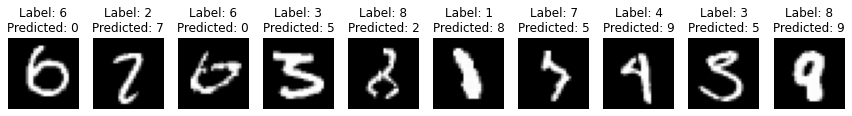

In [37]:
plt.figure(figsize=(15, 15))

j=1
for i in range(len(y_test)):
    if(j>10):
        break
    label = np.argmax(y_test[i])
    pred = np.argmax(preds[i])
    if label != pred:        
        ax = plt.subplot(2, n_examples, j)
        plt.imshow(X_test[i, :, :, 0], cmap='gray')
        plt.title("Label: {}\nPredicted: {}".format(label, pred))
        plt.axis('off')
        j+=1
plt.show()